In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
train_data = datasets.FashionMNIST(root='data',download=True,train=True,transform=ToTensor(),target_transform=None)
test_data = datasets.FashionMNIST(root='data',download=True,train=False,transform=ToTensor(),target_transform=None)

100%|██████████| 26421880/26421880 [00:11<00:00, 2362875.87it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 208528.96it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1930203.91it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7371893.82it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
train_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [4]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [5]:
image, label = train_data[0]

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

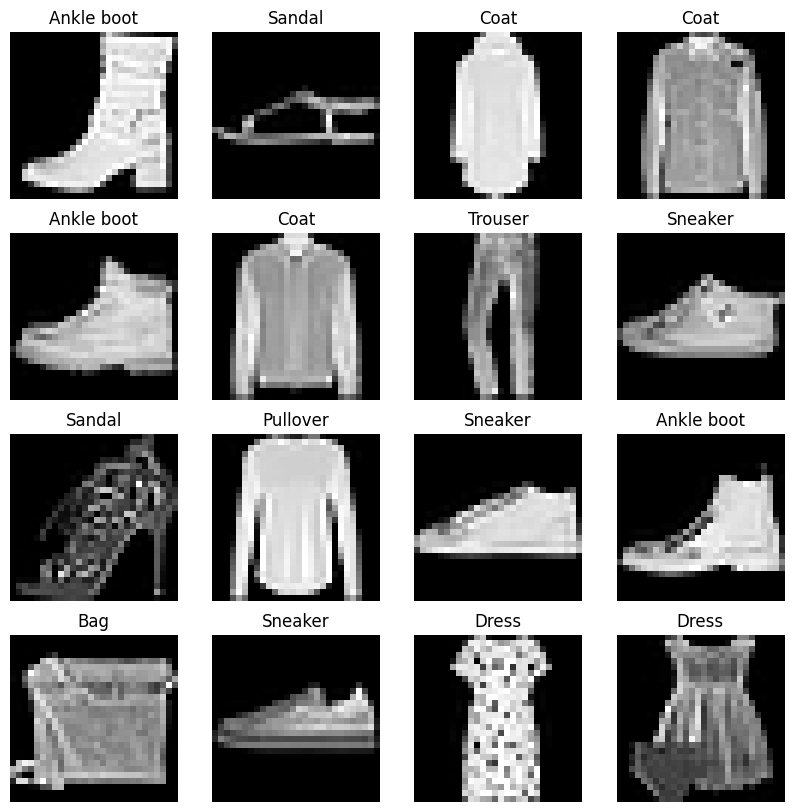

In [7]:
fig = plt.figure(figsize=(10,10))
rows , column = 4,4
for i in range(1,rows*column+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img , label = train_data[random_idx]
  fig.add_subplot(rows,column,i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

In [8]:
train_dataloader = torch.utils.data.DataLoader(train_data,batch_size=32,shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data,batch_size=32,shuffle=True)

In [9]:
train_dataloader

In [10]:
len(train_dataloader) # No of batches that are created - (No. of Samples / batch size) - 60k/32

1875

In [11]:
len(test_dataloader)

313

In [12]:
training_batch , training_batch_labels = next(iter(train_dataloader))

In [13]:
training_batch.shape , training_batch_labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image is of Sneaker , Image size - torch.Size([1, 28, 28]) 


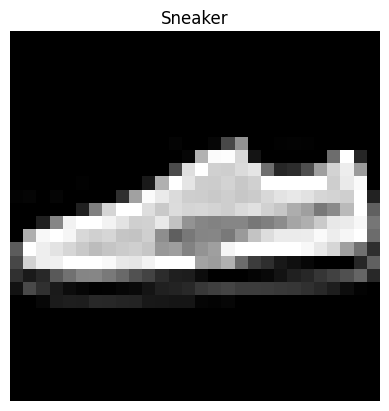

In [14]:
random_idx = torch.randint(0,len(training_batch),size=[1]).item()
img , label = training_batch[random_idx] , training_batch_labels[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image is of {class_names[label]} , Image size - {img.shape} ")

In [15]:
flatten = nn.Flatten()
flatten(training_batch[0].squeeze()).shape

torch.Size([28, 28])

In [68]:
class ImageClassificationModel(nn.Module):
  def __init__(self,input_shape : int , hidden_units : int , output_shape : int):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape , out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units , out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units , out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units , out_features = output_shape),
    )

  def forward(self , x):
    return self.linear_layer_stack(x)

In [69]:
model_0 = ImageClassificationModel(input_shape=28*28,hidden_units=32,output_shape=10)

In [70]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),lr=0.01)

In [71]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = correct/len(y_pred)
  return acc

In [72]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [73]:
from helper_functions import accuracy_fn

In [74]:
model_0(training_batch[0])

tensor([[-0.0863,  0.1071,  0.0088,  0.0974, -0.0981,  0.1620,  0.0875, -0.0389,
         -0.1154, -0.0427]], grad_fn=<AddmmBackward0>)

In [78]:
from tqdm.auto import tqdm

epochs = 10

for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch , (X,y) in enumerate(train_dataloader):
    model_0.train()
    y_train_logits = model_0(X)
    loss = loss_fn(y_train_logits,y)
    train_loss = train_loss + loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss = train_loss/len(train_dataloader)
  test_loss = 0
  test_acc = 0
  for (X,y) in test_dataloader:
    model_0.eval()
    with torch.inference_mode():
      y_test_logits = model_0(X)
      loss = loss_fn(y_test_logits,y)
      test_loss = test_loss + loss
      test_acc = test_acc +  accuracy_fn(y_true=y, y_pred=y_test_logits.argmax(dim=1))

  test_loss = test_loss/len(test_dataloader)
  test_acc = test_acc/len(test_dataloader)

  print(f"Epoch {epoch} , Train Loss {train_loss} , Test Loss {test_loss} , Test Accuracy {test_acc}")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0 , Train Loss 0.4143501818180084 , Test Loss 0.43194735050201416 , Test Accuracy 85.02396166134186
Epoch 1 , Train Loss 0.4110867977142334 , Test Loss 0.48576387763023376 , Test Accuracy 83.74600638977635
Epoch 2 , Train Loss 0.4038609266281128 , Test Loss 0.44998615980148315 , Test Accuracy 84.375
Epoch 3 , Train Loss 0.39546364545822144 , Test Loss 0.4544384777545929 , Test Accuracy 83.84584664536742
Epoch 4 , Train Loss 0.39776158332824707 , Test Loss 0.4885953366756439 , Test Accuracy 84.12539936102236
Epoch 5 , Train Loss 0.3900156021118164 , Test Loss 0.4347445070743561 , Test Accuracy 84.98402555910543
Epoch 6 , Train Loss 0.38270899653434753 , Test Loss 0.44468313455581665 , Test Accuracy 84.62460063897764
Epoch 7 , Train Loss 0.3786541521549225 , Test Loss 0.46797311305999756 , Test Accuracy 85.1138178913738
Epoch 8 , Train Loss 0.38092339038848877 , Test Loss 0.42478489875793457 , Test Accuracy 85.25359424920129
Epoch 9 , Train Loss 0.37597283720970154 , Test Loss 0.45

In [76]:
model_0(training_batch[0])

tensor([[-2.1163e+01, -1.8415e+01, -2.3539e+01, -2.0301e+01, -1.5814e+01,
          1.9802e+00, -1.7755e+01,  9.4324e+00, -1.2143e+00,  9.6434e-03]],
       grad_fn=<AddmmBackward0>)

In [77]:
training_batch_labels.dtype

torch.int64